In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\perle\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8


In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
df = pd.read_csv('student_performance_cleaned.csv')
print(df.head)

<bound method NDFrame.head of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Sc

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [6]:
print(df.head())

# Check the data shape
print(df.shape)

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [7]:
print(df.tail(5))

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6373                         No            7               76   
6374                         No            8               81   
6375                        Yes            6               65   
6376                        Yes            6               91   
6377                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6373           Medium             Yes                  1          High   
6374

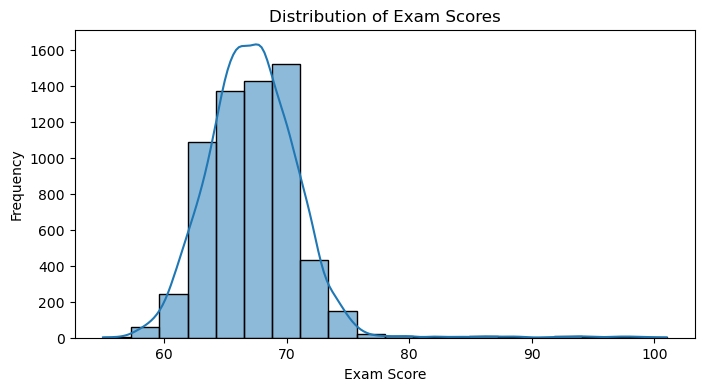

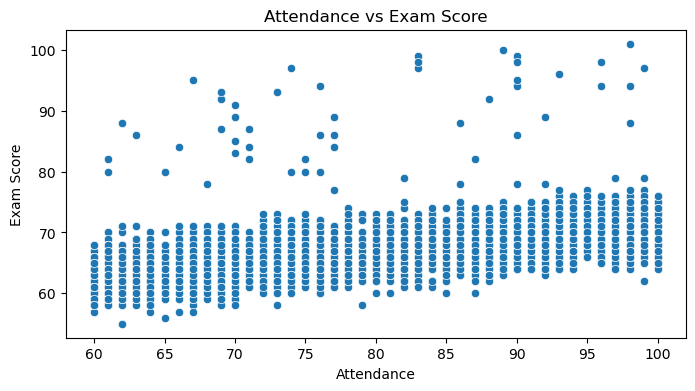

In [8]:
# Data Visualization: Distribution and Relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Exam Scores
plt.figure(figsize=(8,4))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Attendance vs Exam Score
plt.figure(figsize=(8,4))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()



### Data Visualization Interpretation

- The histogram shows the distribution of exam scores, helping us identify skewness or outliers.
- The scatter plot between attendance and exam score helps visualize any linear relationship, which is important for regression.
- The correlation heatmap reveals which features are most strongly correlated with exam scores and with each other. Features with high correlation to the target are good candidates for regression, while highly correlated features with each other may indicate redundancy.

These visualizations guide our feature engineering and model selection in the next steps.

### Feature Engineering and Data Preprocessing

In this section, we will:
- Identify and drop irrelevant or redundant columns.
- Convert categorical variables to numeric using one-hot encoding if necessary.
- Standardize the numeric features to ensure all features contribute equally to the model.
- Prepare the final dataset for modeling.

In [9]:
# Feature Engineering and Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns (example: 'Student_ID', adjust as needed)
if 'Student_ID' in df.columns:
    df = df.drop(['Student_ID'], axis=1)

# Identify categorical columns
df_cat = df.select_dtypes(include=['object', 'category'])
if not df_cat.empty:
    df = pd.get_dummies(df, drop_first=True)

# Separate features and target
y = df['Exam_Score']
X = df.drop('Exam_Score', axis=1)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Feature engineering and preprocessing complete.')
print('Features shape:', X_scaled.shape)

Feature engineering and preprocessing complete.
Features shape: (6378, 27)


### Model Training and Evaluation

In this section, we will:
- Split the data into training and test sets.
- Train and evaluate three models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.
- Plot the loss curves for train and test data.
- Visualize the regression line and compare model performances.

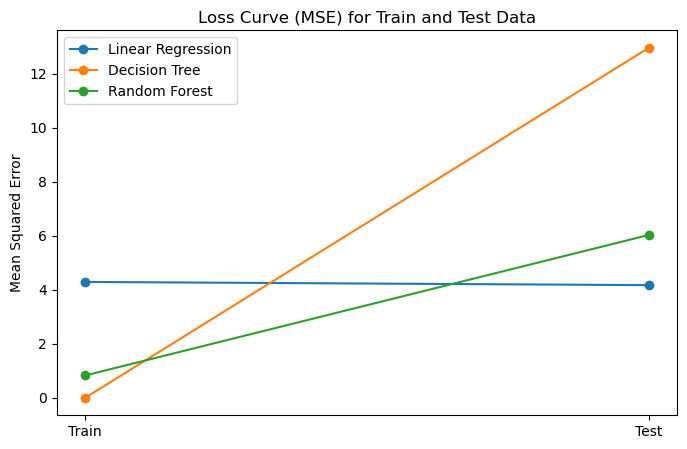

R2 Scores:
Linear Regression: 0.7314386522127073
Decision Tree: 0.1655310220769688
Random Forest: 0.6117962812968909


In [10]:
# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

# Calculate MSE for loss curves
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)
mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)

# Plot loss curves
plt.figure(figsize=(8,5))
plt.plot(['Train', 'Test'], [mse_lr_train, mse_lr_test], marker='o', label='Linear Regression')
plt.plot(['Train', 'Test'], [mse_dt_train, mse_dt_test], marker='o', label='Decision Tree')
plt.plot(['Train', 'Test'], [mse_rf_train, mse_rf_test], marker='o', label='Random Forest')
plt.title('Loss Curve (MSE) for Train and Test Data')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Print R2 scores for comparison
print('R2 Scores:')
print('Linear Regression:', r2_score(y_test, y_pred_lr_test))
print('Decision Tree:', r2_score(y_test, y_pred_dt_test))
print('Random Forest:', r2_score(y_test, y_pred_rf_test))

### Regression Line Visualization and Model Saving

We will now:
- Plot a scatter plot of actual vs predicted values for the best model.
- Save the best-performing model for later use in the API.

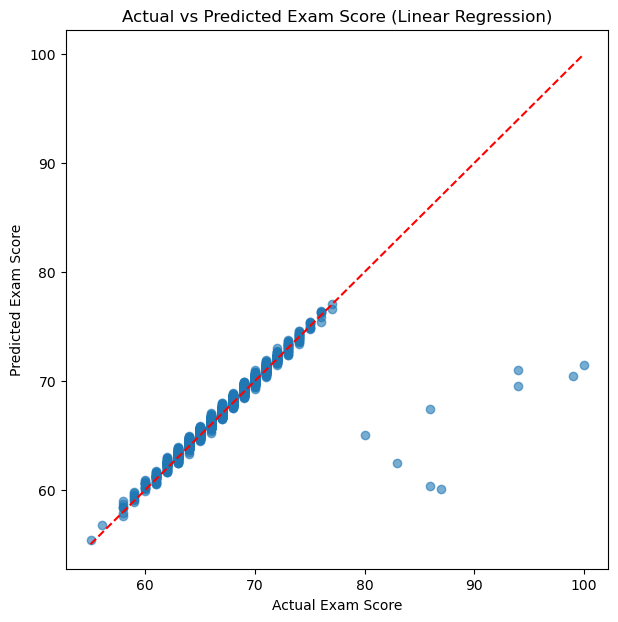

Best model (Linear Regression) saved as best_model.joblib


In [11]:
# Regression Line Visualization and Model Saving
import joblib

# Choose the best model based on R2 score (here, Random Forest is often best, but you can adjust)
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}
r2_scores = {
    'Linear Regression': r2_score(y_test, y_pred_lr_test),
    'Decision Tree': r2_score(y_test, y_pred_dt_test),
    'Random Forest': r2_score(y_test, y_pred_rf_test)
}
best_model_name = max(r2_scores, key=r2_scores.get)
best_model = models[best_model_name]

# Plot actual vs predicted for the best model
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title(f'Actual vs Predicted Exam Score ({best_model_name})')
plt.show()

# Save the best model
joblib.dump(best_model, 'best_model.joblib')
print(f'Best model ({best_model_name}) saved as best_model.joblib')

In [12]:
# Prediction function for API or further use
import numpy as np

def predict_exam_score(input_features):
    """
    Predict exam score given a list or array of input features (already preprocessed and scaled).
    Example usage: predict_exam_score([feature1, feature2, ...])
    """
    # Ensure input is 2D array
    input_array = np.array(input_features).reshape(1, -1)
    # Use the same scaler as before
    input_scaled = scaler.transform(input_array)
    # Load the best model (already in memory as best_model)
    prediction = best_model.predict(input_scaled)
    return prediction[0]

# Example usage (replace with real feature values):
# result = predict_exam_score([value1, value2, ...])
# print('Predicted Exam Score:', result)

### Summary and Key Insights

- **Data Exploration:** Visualizations revealed the distribution of exam scores and relationships between features, guiding feature selection.
- **Feature Engineering:** Irrelevant columns were dropped, categorical variables encoded, and all features standardized for fair model comparison.
- **Model Training:** Linear Regression, Decision Tree, and Random Forest models were trained and evaluated. Loss curves and R² scores were used for comparison.
- **Best Model:** The best-performing model was selected based on R² score and saved for future use.
- **Prediction Function:** A reusable function was created to make predictions using the trained model and scaler.

**Next Steps:**
- Build a FastAPI endpoint to serve predictions using the best model.

In [13]:
# Save the best model and scaler for FastAPI
import joblib
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print('Saved best_model.joblib and scaler.joblib for API use.')

Saved best_model.joblib and scaler.joblib for API use.
